### Import Libraries

In [1]:
import os, sys 
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:

def __get_samples(y, binsize, dn, overlap):

    bins = np.arange(binsize/2, N, overlap)

    maxima, minima, avg = [], [], []
    for bi in bins:
        maxima.append(np.max(y[int((bi-binsize/2)/dn):int((bi+binsize/2)/dn)]))
        minima.append(np.min(y[int((bi-binsize/2)/dn):int((bi+binsize/2)/dn)]))
        avg.append(np.mean(y[int((bi-binsize/2)/dn):int((bi+binsize/2)/dn)]))


    max_idx = [np.where(y == vmax) for vmax in maxima]
    min_idx = [np.where(y == vmin) for vmin in minima]

    maxidx, minidx = [], []
    for i in range(len(max_idx)):
        maxidx.append(max_idx[i][0][0]*dn)
        minidx.append(min_idx[i][0][0]*dn)

    average = [bins, avg]
    minimas = [minidx, minima]
    maximas = [maxidx, maxima]
    
    return maximas, minimas, average
    

### Configurations

In [3]:
## decide if figure is stored
save = True

## set path to figures
path2plots = " "

## parameters for signal generation
N = 2000
dn = 0.01

## define bins
binsize = 400 
overlap = 0.5*binsize
bins = np.arange(binsize/2, N, overlap)

## variable amplitudes
m1, m2 = 0.8, 1.2
amps = m1 + (m2-m1)*random.random()


f_min, f_max = -1e-3, 1e-3
freq_variations = f_min + (f_max-f_min)*random.random()

## frequency shift
df = 0.02

## nominal frequeny
f0 = 0.5


## time axis
xx = np.arange(0, N, dn)

## intensity offset
offset = 1.2

## plot offsets
offset1 = 1
offset2 = 1.5

In [4]:
## ________________________________________________

f1 = (f0 + freq_variations) *np.ones(len(xx))
f2 = (f0 + freq_variations + df) *np.ones(len(xx))

sig1 = amps * (np.cos(2*np.pi* abs(f1-f2)**0.95/2 *xx + 1.8) + offset)

fsag1 = (f1-f2)/2

## ________________________________________________

sig2 = sig1 *0.4 + 1.6


## ________________________________________________

fsr = 1.8e-3

f11 = f0 + fsr
f22 = f0 - fsr 

sig3 = amps * (np.cos(2*np.pi* (f11-f22)/2 *xx + 1.8) + offset)

fsag2 = (f11-f22)/2

sig3 =  sig1 + np.linspace(0,.8,len(xx)) * sig3


# sig = amps * (np.cos(2* np.pi* (fsag1 - fsag2)/2 *xx + 1.8) + offset)


# beam1 = amps * np.sin((2*np.pi*xx*f1)) + offset
# beam2 = amps * np.sin((2*np.pi*xx*f2)) + offset

FileNotFoundError: [Errno 2] No such file or directory: '/home/andbro/Desktop/ROMY-QualityQuantitiesScheme.png'

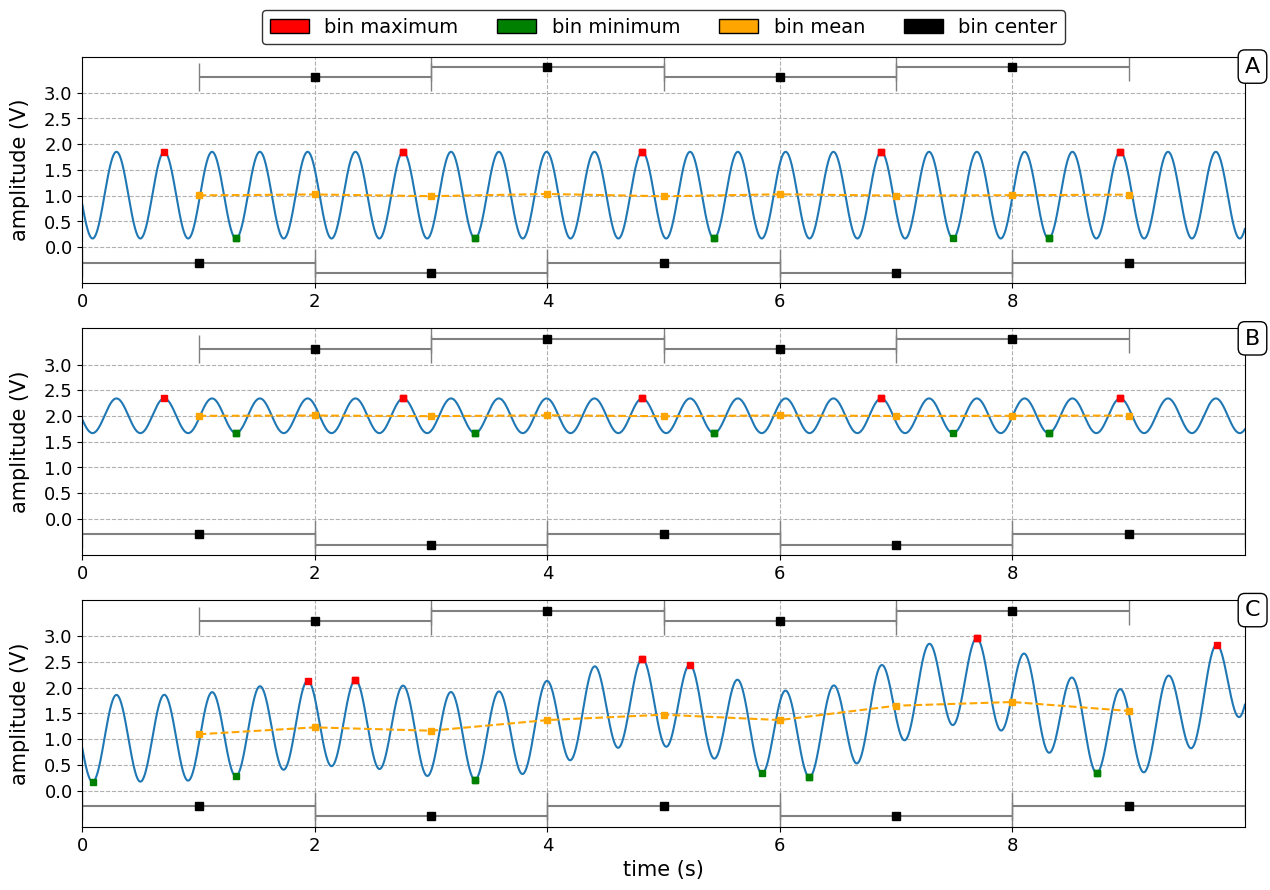

In [5]:
def __makeplot():

    fig, ax = plt.subplots(3,1, figsize=(15,10))

    fs = 15
    ll = 9
    ms = 5

    bbox = dict(boxstyle="round", fc="white")


    for k in range(3):


        binloc = np.ones(len(bins)); binloc[::2] *= -1

        for i, bi in enumerate(bins[:ll]):
            if i in [2,3,6,7]:
                ax[k].errorbar(bins[i], offset2+2*offset1*binloc[i],marker='s',color="black",xerr=binsize/2, capsize=10, ecolor='grey', linestyle='') 
            else:
                ax[k].errorbar(bins[i], offset2+1.8*offset1*binloc[i],marker='s',color="black",xerr=binsize/2, capsize=10, ecolor='grey', linestyle='') 

        ### ________________________________________________

        if k == 0:

            ax[k].plot(xx,sig1)

            maximas, minimas, average = __get_samples(sig1, binsize, dn, overlap)

            ax[k].plot(maximas[0][:], maximas[1][:], 'rs', markersize=ms, zorder=3)

            ax[k].plot(minimas[0][:], minimas[1][:], 'gs', markersize=ms, zorder=3)

            ax[k].plot(average[0][:], average[1][:], color="orange", marker='s', markersize=ms, linestyle="--", zorder=3)
            
            ax[k].annotate('A', xy=(1.00, 0.93), xycoords='axes fraction', bbox=bbox, fontsize=fs+1)

        ### ________________________________________________

        if k == 1:

            ax[k].plot(xx,sig2)

            maximas, minimas, average = __get_samples(sig2, binsize, dn, overlap)

            ax[k].plot(maximas[0][:], maximas[1][:], 'rs', markersize=ms, zorder=3)

            ax[k].plot(minimas[0][:], minimas[1][:], 'gs', markersize=ms, zorder=3)

            ax[k].plot(average[0][:], average[1][:], color="orange", marker='s', markersize=ms, linestyle="--", zorder=3)

            ax[k].annotate('B', xy=(1.00, 0.93), xycoords='axes fraction', bbox=bbox, fontsize=fs+1)

        ### ________________________________________________

        if k == 2:

            ax[k].plot(xx,sig3)

            maximas, minimas, average = __get_samples(sig3, binsize, dn, overlap)

            ax[k].plot(maximas[0][:], maximas[1][:], 'rs', markersize=ms, zorder=3)

            ax[k].plot(minimas[0][:], minimas[1][:], 'gs', markersize=ms, zorder=3)
            
            ax[k].plot(average[0][:], average[1][:], color="orange", marker='s', markersize=ms, linestyle="--", zorder=3)

            ax[k].annotate('C', xy=(1.00, 0.93), xycoords='axes fraction', bbox=bbox, fontsize=fs+1)

            
        ax[k].tick_params(axis='both', labelsize=fs)

        ax[k].grid(ls='--', zorder=1)
        
        ax[k].set_xlim(0, 2000)
        
        ax[k].set_ylabel('amplitude (V)', fontsize=fs, labelpad=10)

        ax[k].set_xticks(range(0, int(ll/2*binsize), binsize))
        ax[k].set_xticklabels(range(0, int(ll/2*2), 2), fontsize=fs-2)

        ax[k].set_yticks(np.arange(0, 3.5, 0.5))
        ax[k].set_yticklabels(np.arange(0, 3.5, 0.5), fontsize=fs-2)

        
        ## add legend 
        from matplotlib.patches import Polygon, Patch

        if k == 0:
            legend_elements = [
                               Patch(facecolor='red', edgecolor='black', label='bin maximum'),
                               Patch(facecolor='green', edgecolor='black', label='bin minimum'),
                               Patch(facecolor='orange', edgecolor='black', label='bin mean'),
                               Patch(facecolor='black', edgecolor='black', label='bin center')
                              ]

            ax[k].legend(handles=legend_elements, loc='upper center', fontsize=fs-1, ncol=4, edgecolor='black', bbox_to_anchor=(0.5, 1.25))

        if k == 2:
            ax[k].set_xlabel('time (s)', fontsize=fs)

            
    return fig 

## ____________________________________

fig = __makeplot()

if save:
    fig.savefig("/home/andbro/Desktop/"+f"ROMY-QualityQuantitiesScheme.png", dpi=300, format='png',pad_inches=0.01, facecolor='white', transparent=False)